# REGULARIZATION WITH REAL VARIABLE Y

- load data and apply log transformation if necessary
- load $glmnet$
- apply ridge regression
- plot the lambda selection
- perfrom cross validation to find best lambda
- re-estimate the model usign the best lambda
- perform the same analysis usign lasso

In [1]:
library(ISLR)
data(Hitters)

## omit missing 
hitters <- na.omit(Hitters) 
dim(hitters)

names(hitters)
hitters$Salary <- log(hitters$Salary)

[1] 263  20

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [10]:
### load data and apply log transform if necessary


##boxplot and hist to check normality(if there isn't apply log transf otherwise not)

#par(mfrow=c(2,2))
#boxplot(mydata$Y, ylab='Yy', main='Original scale',col="lightblue")
#boxplot(log(mydata$Y), ylab='Y', main='Logarithmic transformation',col="lightblue")

#hist(mydata$Y, ylab='Yy', main='Original scale',col="lightblue")
#hist(log(mydata$Y), ylab='Y', main='Logarithmic transformation',col="lightblue")



# mydata$y<-log(mydata$y)

## RIDGE

In [2]:
library(glmnet)
y <- hitters$Salary
X <- model.matrix(Salary ~ ., data=hitters)[,-1]
m.ridge <- glmnet(X, y, alpha=0)
m.ridge

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16




Call:  glmnet(x = X, y = y, alpha = 0) 

       Df      %Dev    Lambda
  [1,] 19 7.070e-36 551.20000
  [2,] 19 1.214e-02 502.20000
  [3,] 19 1.330e-02 457.60000
  [4,] 19 1.456e-02 417.00000
  [5,] 19 1.595e-02 379.90000
  [6,] 19 1.746e-02 346.20000
  [7,] 19 1.911e-02 315.40000
  [8,] 19 2.091e-02 287.40000
  [9,] 19 2.288e-02 261.90000
 [10,] 19 2.503e-02 238.60000
 [11,] 19 2.736e-02 217.40000
 [12,] 19 2.990e-02 198.10000
 [13,] 19 3.267e-02 180.50000
 [14,] 19 3.568e-02 164.50000
 [15,] 19 3.895e-02 149.90000
 [16,] 19 4.249e-02 136.50000
 [17,] 19 4.634e-02 124.40000
 [18,] 19 5.050e-02 113.40000
 [19,] 19 5.500e-02 103.30000
 [20,] 19 5.985e-02  94.11000
 [21,] 19 6.509e-02  85.75000
 [22,] 19 7.073e-02  78.13000
 [23,] 19 7.679e-02  71.19000
 [24,] 19 8.329e-02  64.87000
 [25,] 19 9.025e-02  59.11000
 [26,] 19 9.768e-02  53.85000
 [27,] 19 1.056e-01  49.07000
 [28,] 19 1.140e-01  44.71000
 [29,] 19 1.229e-01  40.74000
 [30,] 19 1.324e-01  37.12000
 [31,] 19 1.423e-01  33.8200

The output reports the value fo the deviance for each value of λ.

In [ ]:
## ridge regression

#library(glmnet)
#y <-  mydata$y
#X <- model.matrix(y ~ ., data=mydata)[,-1]
#m.ridge <- glmnet(X, y, alpha=0)
#m.ridge

### comment

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered ... $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  Numbers ( NUMERO COVARIATE CHE HAI, repeated) over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:NUMERO COVARIATE CHE HAI is repeated, as ridge regression is not a selection method.


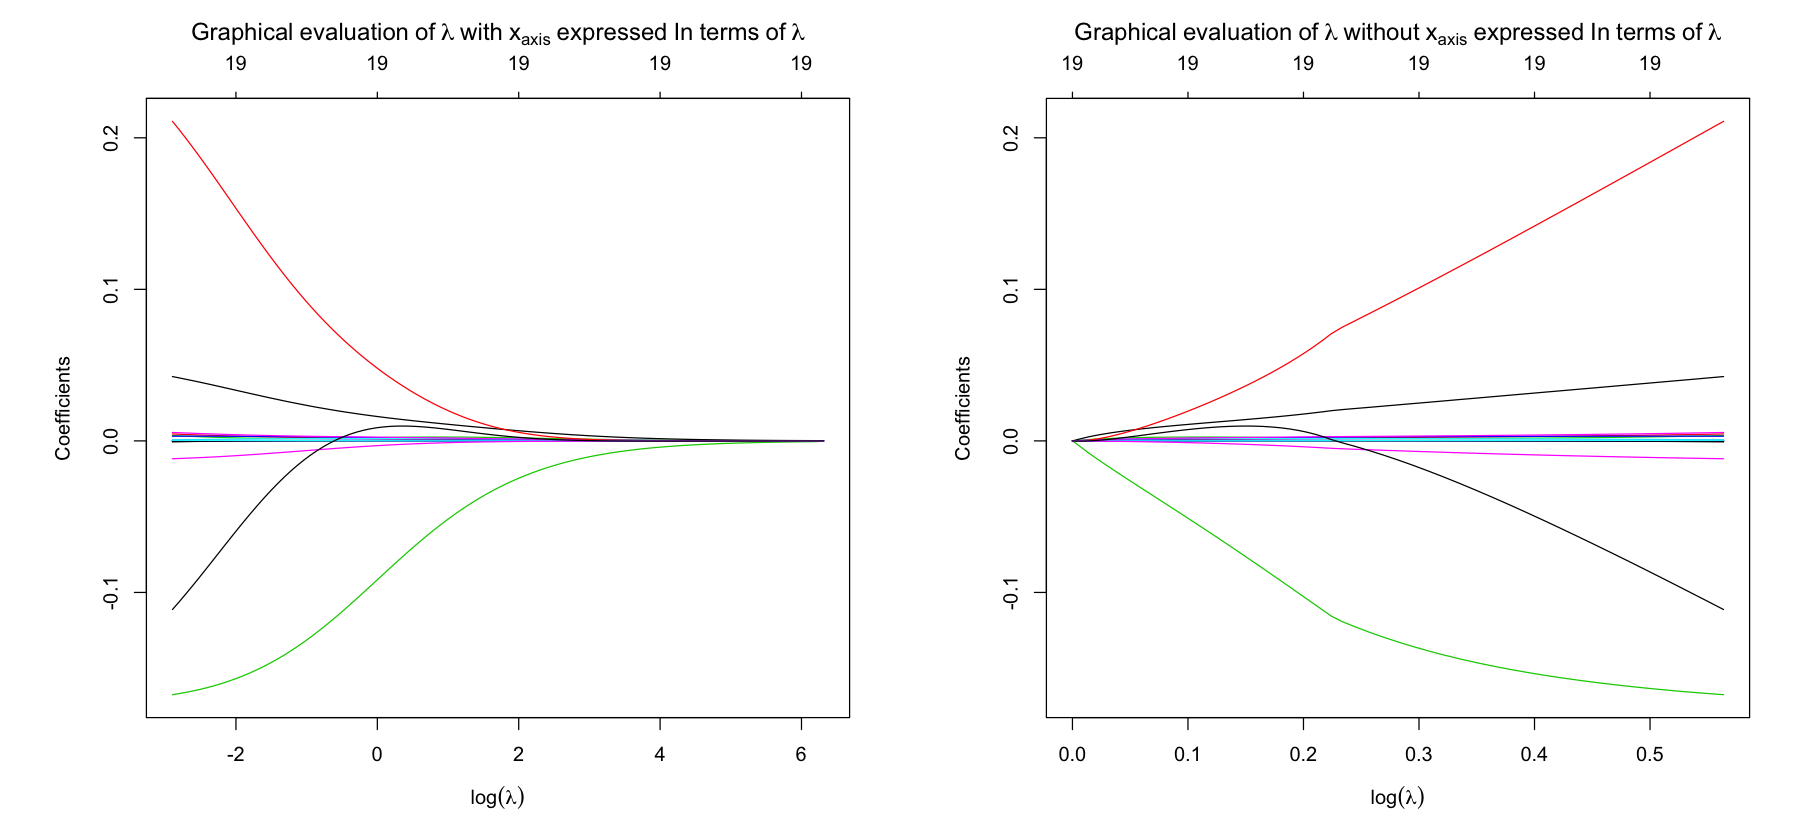

In [38]:
options(repr.plot.width = 15, repr.plot.height = 7)
    par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

In [39]:
## plot graphical evaluation

#options(repr.plot.width = 15, repr.plot.height = 7)
#par(mar = c(5.1, 6.1, 4.1, 2.1))
 #   par(mfrow=c(1,2))

#plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
#plot(m.ridge, xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

#### comment

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: VALORE BEST LAMBDA \
And the MSE is: VALORE MSE

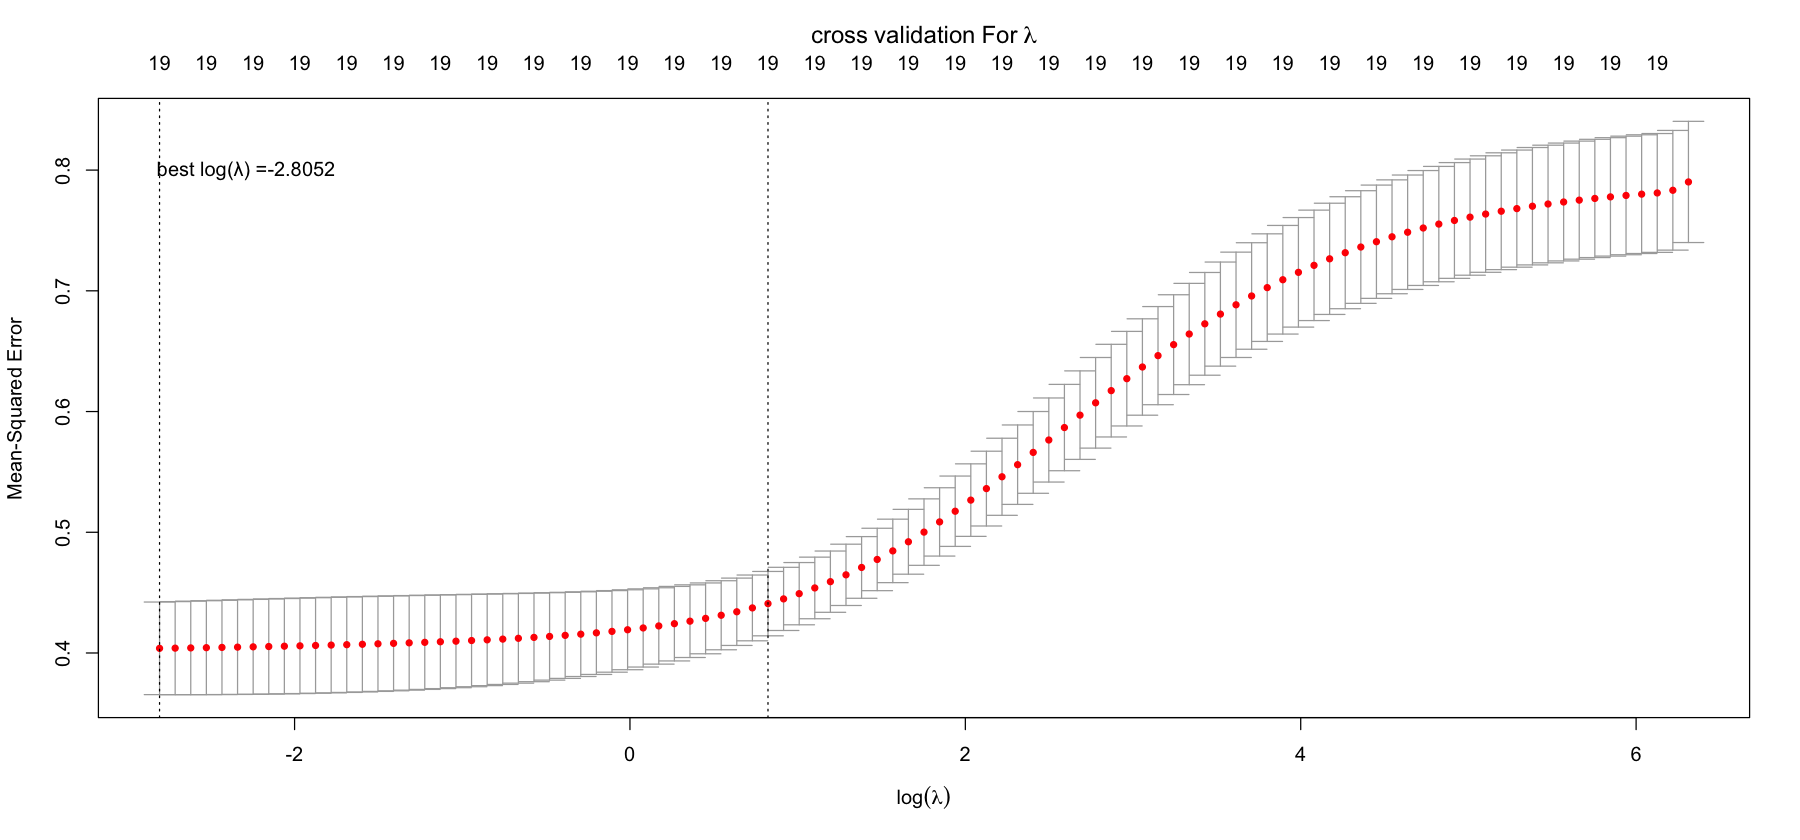

In [72]:
set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0)
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

In [71]:
best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

[1] 0.060496

[1] 0.4038536

In [ ]:
### cross validation plot

#set.seed(2906)
#options(warn=-1)
#cv.ridge <- cv.glmnet(X, y, alpha=0)
#plot(cv.ridge, xlab=expression(log(lambda)))
#text(x=log(cv.ridge$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
#title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

#best.lambda <- cv.ridge$lambda.min
#best.lambda

#mse<-min(cv.ridge$cvm)
#mse


Call:  glmnet(x = X, y = y, alpha = 0, lambda = best.lambda) 

     Df   %Dev Lambda
[1,] 19 0.5439 0.0605

20 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  4.595305e+00
AtBat       -5.160388e-04
Hits         4.396714e-03
HmRun        3.359157e-03
Runs         3.110850e-03
RBI          7.308564e-04
Walks        5.371948e-03
Years        4.171532e-02
CAtBat       3.892745e-05
CHits        1.913195e-04
CHmRun      -5.602232e-05
CRuns        2.972823e-04
CRBI         1.652623e-04
CWalks      -3.891595e-04
LeagueN      2.052706e-01
DivisionW   -1.666745e-01
PutOuts      2.925873e-04
Assists      3.949817e-04
Errors      -1.161143e-02
NewLeagueN  -1.060981e-01

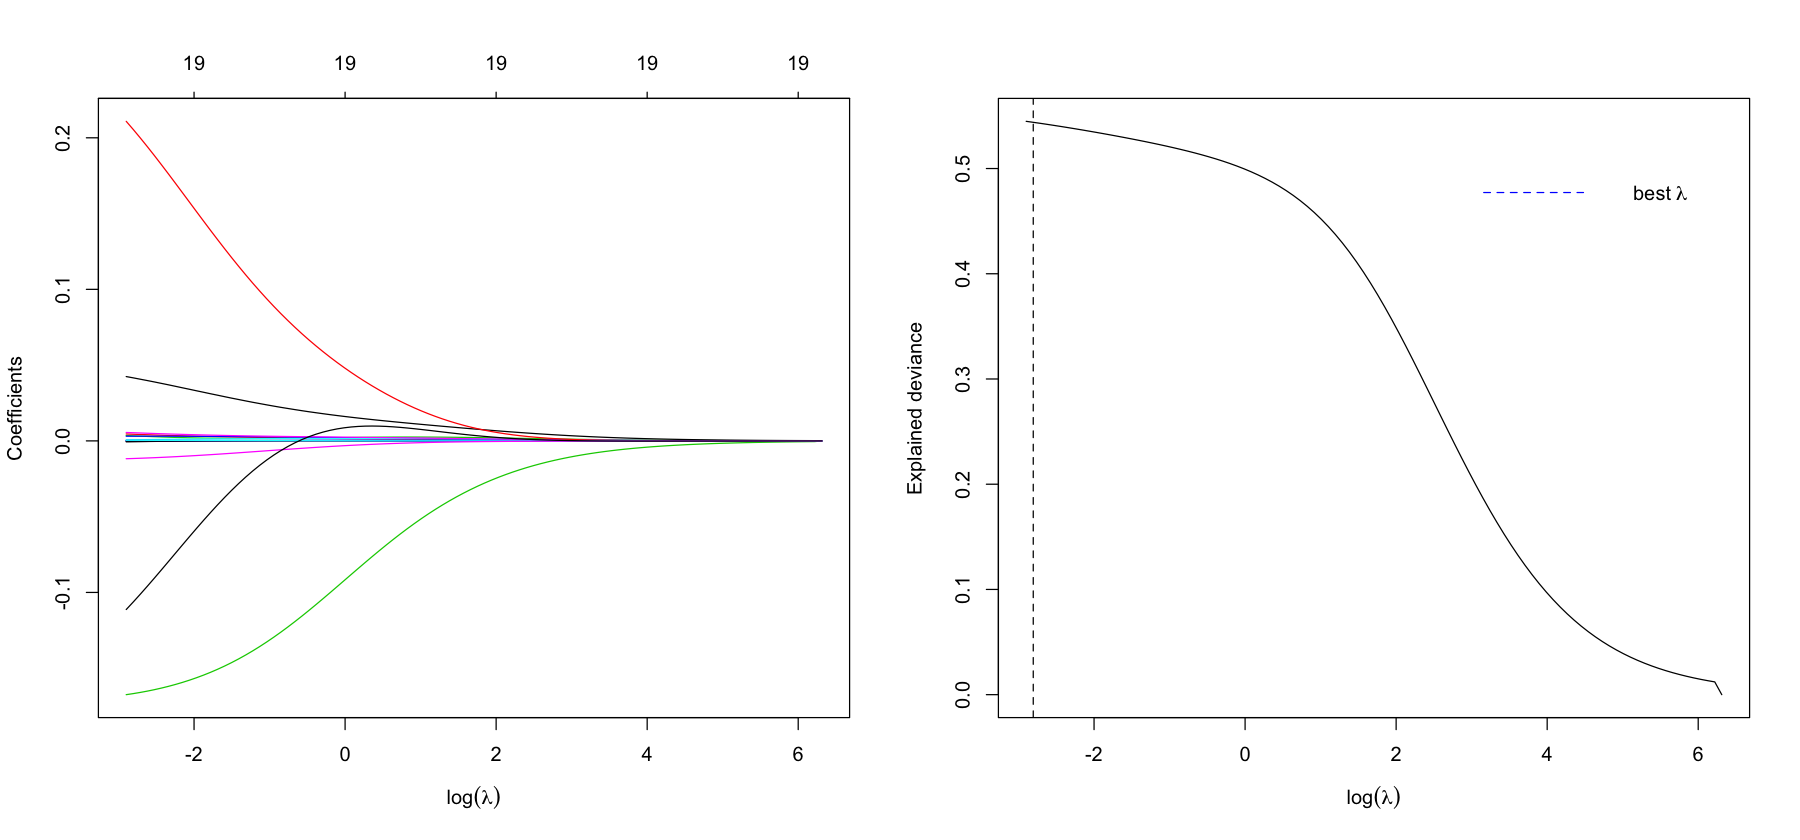

In [92]:
m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2)
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n",
       y=0.5)

### comment

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: VALORE 

In [75]:
#### best model

#m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)
#m.ridge.min
#coef(m.ridge.min)

#par(mfrow=c(1,2))
#plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
#plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
#        xlab=expression(log(lambda)), ylab='Explained deviance')
#abline(v=log(best.lambda), lty=2,color="blue")
#legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
#title (Graph of explained deviance,line=2.7)


## maxi explained deviance
#max(m.ridge$dev.ratio)


Call:  glmnet(x = X, y = y, alpha = 0, lambda = best.lambda) 

     Df   %Dev Lambda
[1,] 19 0.5439 0.0605

20 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  4.595305e+00
AtBat       -5.160388e-04
Hits         4.396714e-03
HmRun        3.359157e-03
Runs         3.110850e-03
RBI          7.308564e-04
Walks        5.371948e-03
Years        4.171532e-02
CAtBat       3.892745e-05
CHits        1.913195e-04
CHmRun      -5.602232e-05
CRuns        2.972823e-04
CRBI         1.652623e-04
CWalks      -3.891595e-04
LeagueN      2.052706e-01
DivisionW   -1.666745e-01
PutOuts      2.925873e-04
Assists      3.949817e-04
Errors      -1.161143e-02
NewLeagueN  -1.060981e-01

## Lasso

#### comment
 Let's perform the analysis usign lasso

[1] 0.406681

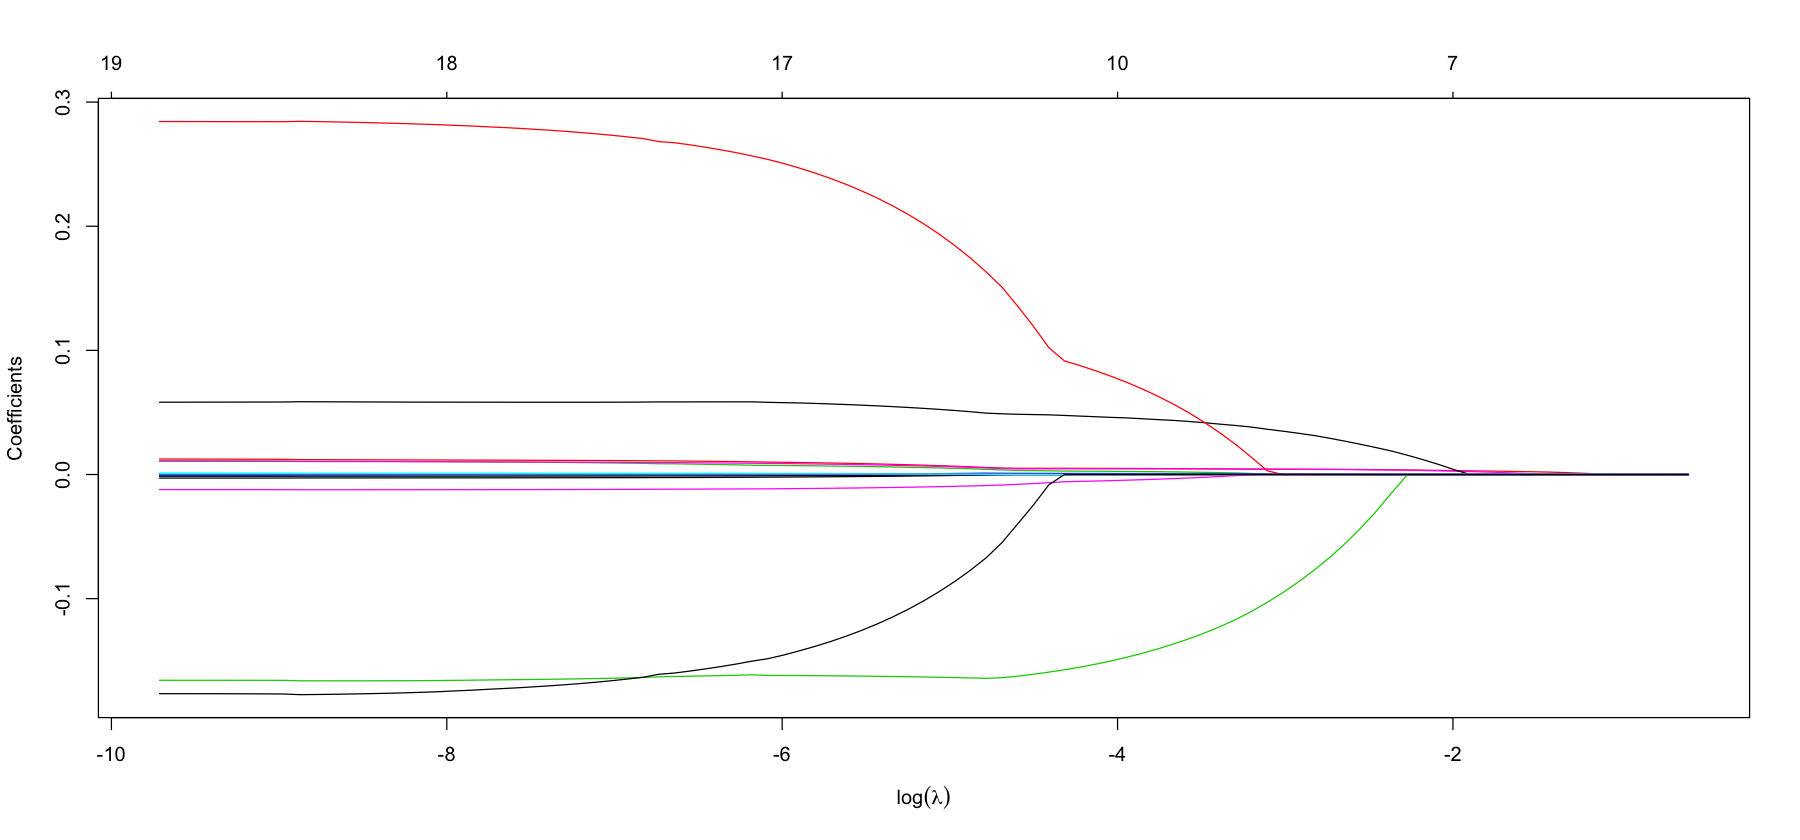

In [99]:
m.lasso <- glmnet(X, y, alpha=1)
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
## fix the seed to the same value used for ridge regression
set.seed(2906)
cv.lasso <- cv.glmnet(X, y, alpha=1)
best.lambda.lasso <- cv.lasso$lambda.min
min(cv.lasso$cvm)

On the basis of MSE, the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.

In [ ]:
## lasso regression

#library(glmnet)
#m.lasso <- glmnet(X, y, alpha=1)
#m.lasso

The output reports the value fo the deviance for each value of λ.

### comment

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered ... $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  Numbers ( NUMERO COVARIATE CHE HAI, repeated) over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:NUMERO COVARIATE CHE HAI is not repeated, as lasso regression is a selection method.


In [ ]:
## plot graphical evaluation

#options(repr.plot.width = 15, repr.plot.height = 7)
#par(mar = c(5.1, 6.1, 4.1, 2.1))
 #   par(mfrow=c(1,2))

#plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
#plot(m.lasso, xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

#### comment

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: VALORE BEST LAMBDA \
And the MSE is: VALORE MSE

In [ ]:
### cross validation plot

#set.seed(2906)
#options(warn=-1)
#cv.lasso <- cv.glmnet(X, y, alpha=1)
#plot(cv.lassp, xlab=expression(log(lambda)))
#text(x=log(cv.lasso$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
#title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

#best.lambda <- cv.lasso$lambda.min
#best.lambda

#mse<-min(cv.lasso$cvm)
#mse




On the basis of MSE (!!!if they are similar took lasso since is simpler/ if they are different took the model with the lowest one), the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: VALORE \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular the coefficients equal to zero are (!! se sono troppi di solo il numero che ti esce dal codice e non usare il commsndo coeff(m.lasso.min)):
- coefficiente 1 con puntino su tabella
- coefficiente 2 con puntino su tabella



In [ ]:
#### best model

#m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda)
#m.lasso.min
#coef(m.lasso.min)

## number of coefficient diversi da 0

#id.zero <- which(coef(m.lasso.min)==0)
#nonzero <- length(coef(m.lasso.min))-length(id.zero)
#nonzero



#par(mfrow=c(1,2))
#plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
#plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
#        xlab=expression(log(lambda)), ylab='Explained deviance')
#abline(v=log(best.lambda), lty=2,color="blue")
#legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
#title (Graph of explained deviance,line=2.7)


## maxi explained deviance
#max(m.lasso$dev.ratio)

In the following plot there is the comparison of prediction  with lasso and ridge.

In [ ]:
## prediction

#prediction.ridge <- predict(m.ridge.min, newx=X)
#prediction.lasso <- predict(m.lasso.min, newx=X)

#par(mfrow=c(1,2))
#plot(prediction.ridge, mydata$price,
#        main='Predictions with Ridge')
#abline(0,1,col="red")
#plot(prediction.lasso, mydata$price,
 #       main='Predictions with Lasso')
#abline(0,1,col="red")

Compare the results with those from the linear model.
We have that :
- MSE for lasso is:.... (SECONDO NUMERO OUTPUT)
- MSE for linear model is:.... (PRIMO NUMERO OUTPUT)
 
So Lasso is preferable in terms of mean squared error. But since there is no substantial variable selection, it does not seem to be so interesting.

(NATURALMENTE SE HAI UNA SELEZIONE VARIABILI STA ROBA NON STA IN PIEDI E NON DIRLA)

# REGULARIZATION WITH CATEGORICAL Y (0,1)

- load data and check if categorical y
- perform ridge taking care of $family="binomial"$ in glm() function
- same analysis of before
- use lasso


In [10]:
load("Leukemia.RData")
ls()
names(Leukemia)
table(Leukemia$y)
dim(Leukemia$x)

[1] "Leukemia" "mydata"

[1] "x" "y"


 0  1 
47 25 

[1]   72 3571

In [ ]:
## load data and check categorical

#load("namefile.RData")
#ls()
#names(namefile)
# mydata<-namefile


##check categorical
#table(mydata$y)

##check number observation 
#dim(mydata$x)

#### comment 
we see that we have a categorical Y. Furthermore, there are $p>n$ so let's use regularization. In particular ridge and lasso regression.

In [12]:
m <- glm(y ~ x, data=Leukemia, family='binomial')
m


Call:  glm(formula = y ~ x, family = "binomial", data = Leukemia)

Coefficients:
(Intercept)           x1           x2           x3           x4           x5  
    -8.1174     -10.3317      49.9612      41.5371     -50.8280     -35.6423  
         x6           x7           x8           x9          x10          x11  
   -43.6784     128.6965    -138.7139    -242.1772     295.9416     111.2016  
        x12          x13          x14          x15          x16          x17  
  -222.4892       2.0517     -30.4774      37.8572     -10.1176       5.2252  
        x18          x19          x20          x21          x22          x23  
   -83.9841      67.5812    -104.3280      32.4685       6.8192      23.9313  
        x24          x25          x26          x27          x28          x29  
     4.3929       3.2716     -35.1685      31.3292      -0.7366     -48.0445  
        x30          x31          x32          x33          x34          x35  
    -1.9030       3.7588      20.0601      32.070

(here we have tryed logistic regression but we can see that there are NA coefficients so you can't use logistic regression)

#### comment

Let's start with ridge regression.

In [21]:
leukemia.ridge <- glmnet(Leukemia$x, Leukemia$y, alpha=0, family='binomial')

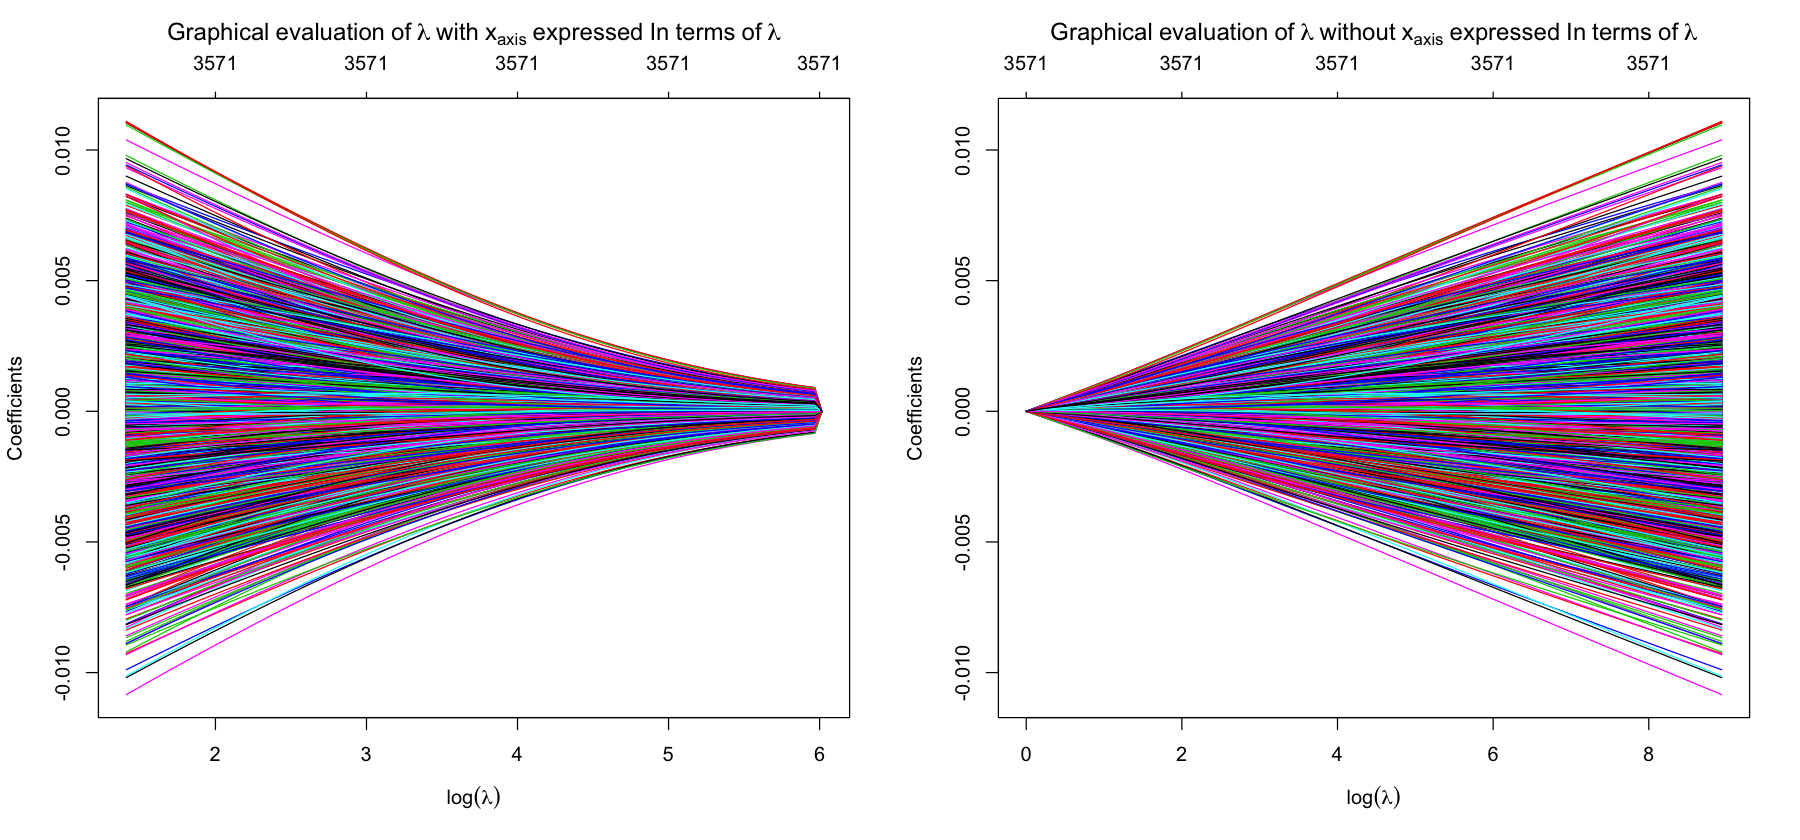

In [18]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(leukemia.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(leukemia.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

In [19]:
## regression and plot

# m.ridge <- glmnet(mydata$x, mydata$y, alpha=0, family='binomial')
#m.ridge




The output reports the value fo the deviance for each value of $\lambda$.

In [ ]:

## plot graphical evaluation

#options(repr.plot.width = 15, repr.plot.height = 7)
#par(mar = c(5.1, 6.1, 4.1, 2.1))
 #   par(mfrow=c(1,2))

#plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
#plot(m.ridge, xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

### comment

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered ... $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  Numbers ( NUMERO COVARIATE CHE HAI, repeated) over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:NUMERO COVARIATE CHE HAI is repeated, as ridge regression is not a selection method.


In [23]:
set.seed(111)
cv.leukemia.ridge <- cv.glmnet(Leukemia$x, Leukemia$y, alpha=0, family='binomial',
        lambda.min = 1e-4)
best.lambda.leukemia <- cv.leukemia.ridge$lambda.min
best.lambda.leukemia

## [1] 0.04093098
min(cv.leukemia.ridge$cvm)

[1] 0.0449217

[1] 0.1473256

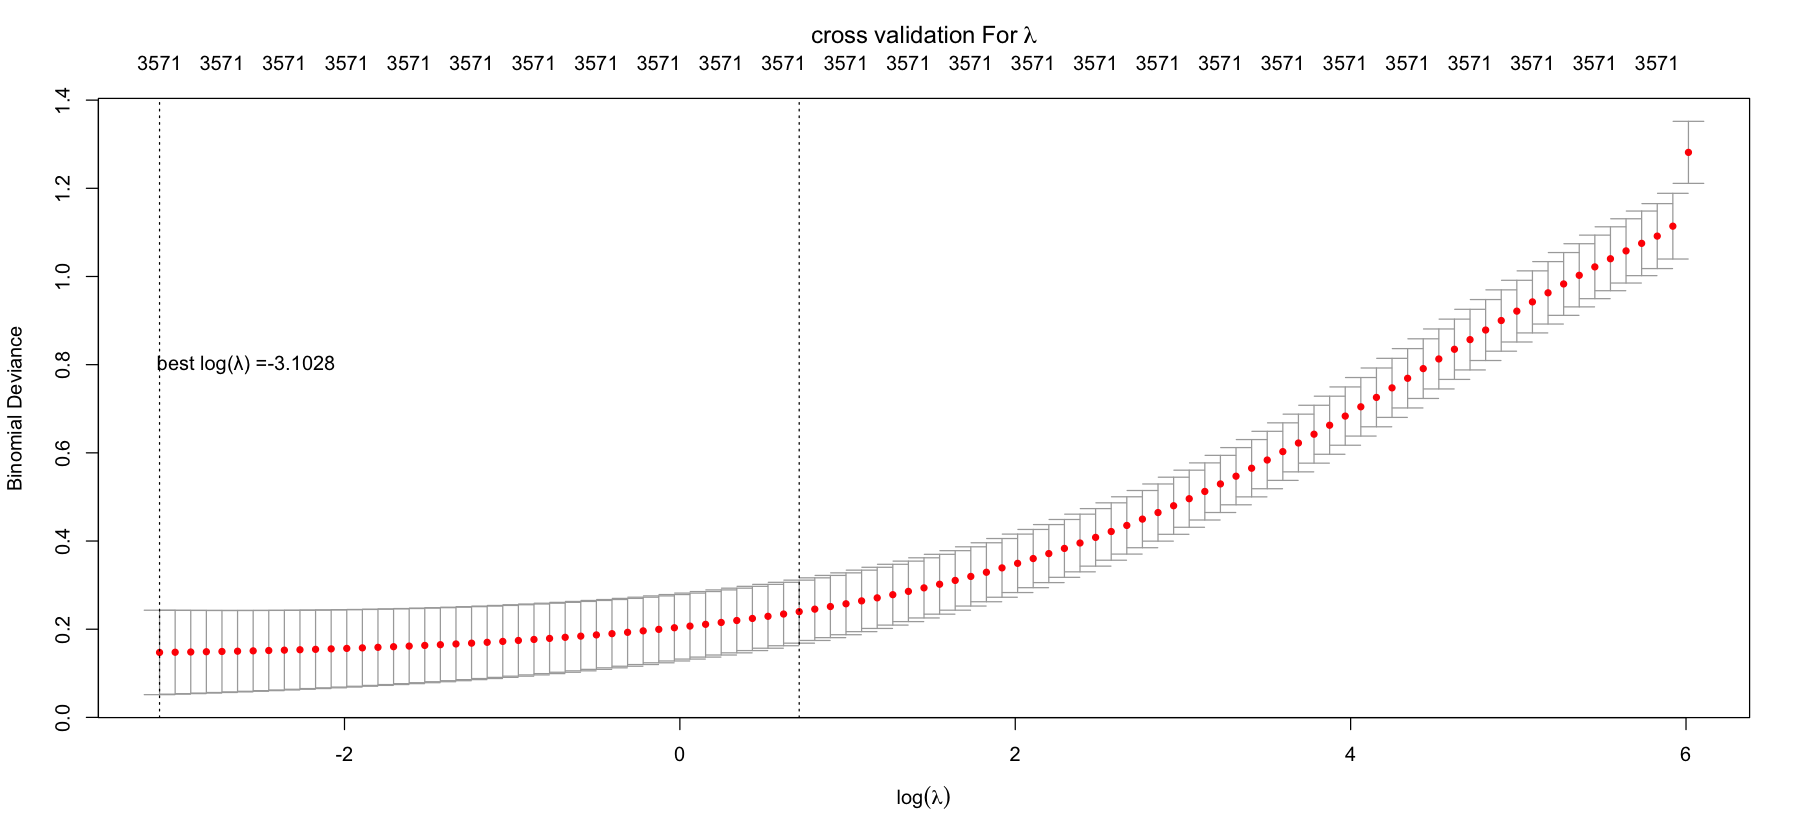

In [26]:
options(warn=-1)
plot(cv.leukemia.ridge, xlab=expression(log(lambda)))
text(x=log(cv.leukemia.ridge$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.leukemia.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)


#### comment

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: VALORE BEST LAMBDA \
And the MSE is: VALORE MSE

In [ ]:
### cross validation plot

#set.seed(2906)
#options(warn=-1)
#cv.ridge <- cv.glmnet(mydata$x, mydata$y, alpha=0,family="binomial",lambda.min=1e-a)
#plot(cv.ridge, xlab=expression(log(lambda)))
#text(x=log(cv.ridge$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
#title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

#best.lambda <- cv.ridge$lambda.min
#best.lambda

#mse<-min(cv.ridge$cvm)
#mse

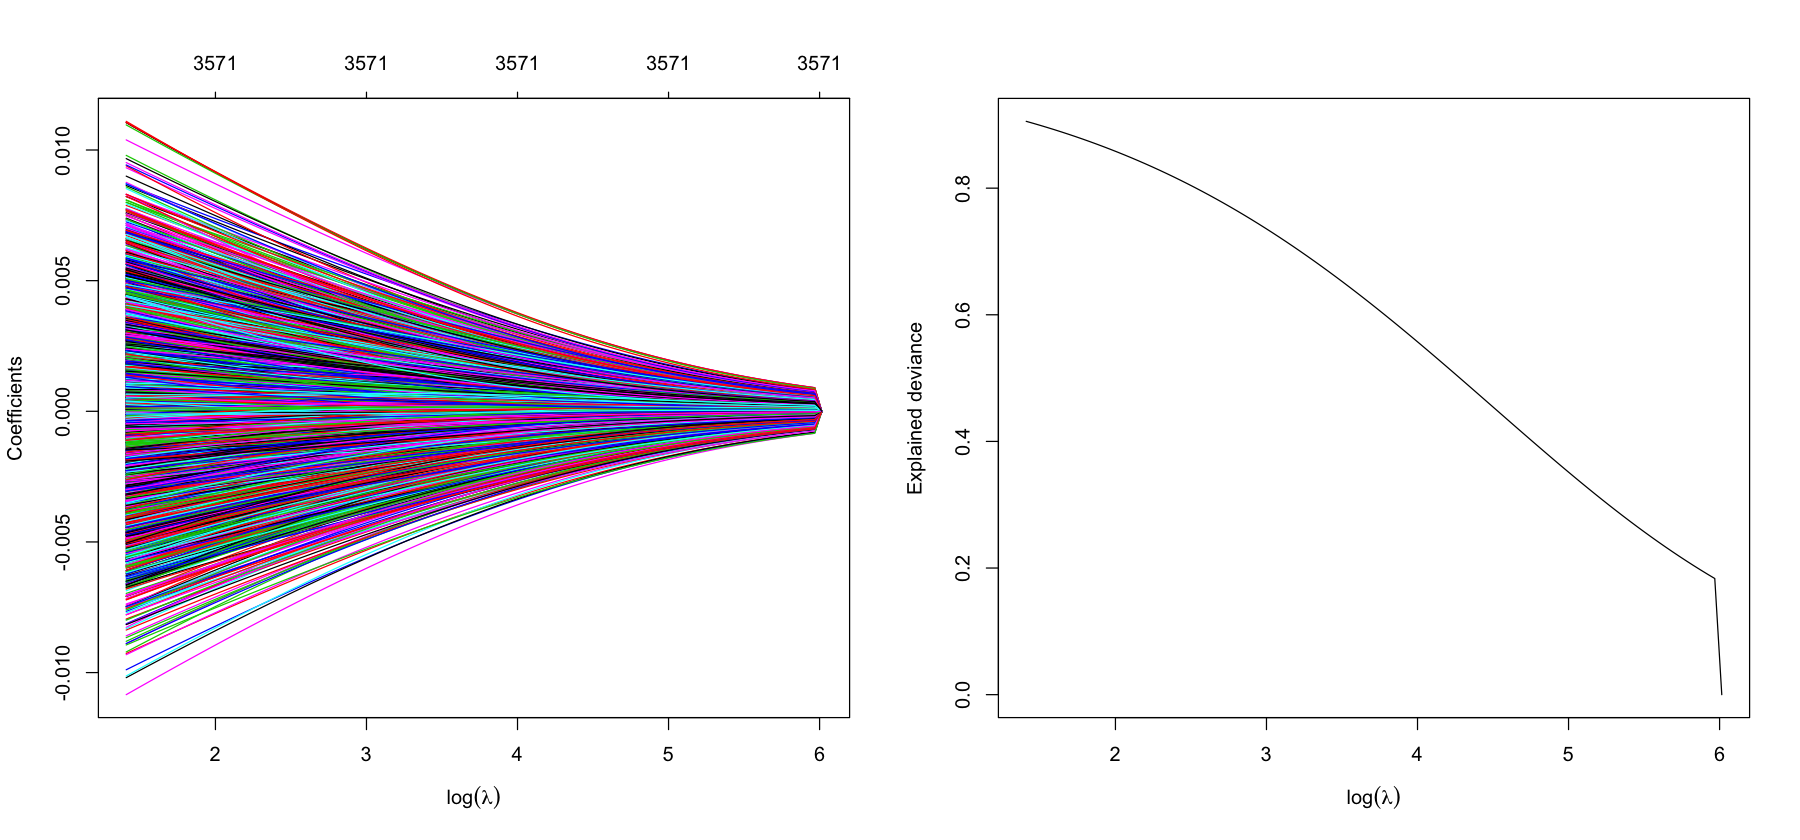

In [31]:
leukemia.ridge.min <- glmnet(Leukemia$x, Leukemia$y, alpha=0, family='binomial',
        lambda=best.lambda.leukemia)
par(mfrow=c(1,2))
plot(leukemia.ridge, xvar='lambda', xlab=expression(log(lambda)))
## add on the line corresponding to the best lambda
abline(v=log(best.lambda.leukemia), lty=2)
## deviance
plot(log(leukemia.ridge$lambda), leukemia.ridge$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda.leukemia), lty=2)

### comment

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: VALORE 

In [ ]:
#### best model

#m.ridge.min <- glmnet(mydata$x, mydata$y, alpha=0,family="binomial", lambda=best.lambda)
#m.ridge.min
#coef(m.ridge.min)

#par(mfrow=c(1,2))
#plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
#plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
#        xlab=expression(log(lambda)), ylab='Explained deviance')
#abline(v=log(best.lambda), lty=2,color="blue")
#legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
#title (Graph of explained deviance,line=2.7)


## maxi explained deviance
#max(m.ridge$dev.ratio)

#### LASSO

#### comment
 Let's perform the analysis usign lasso

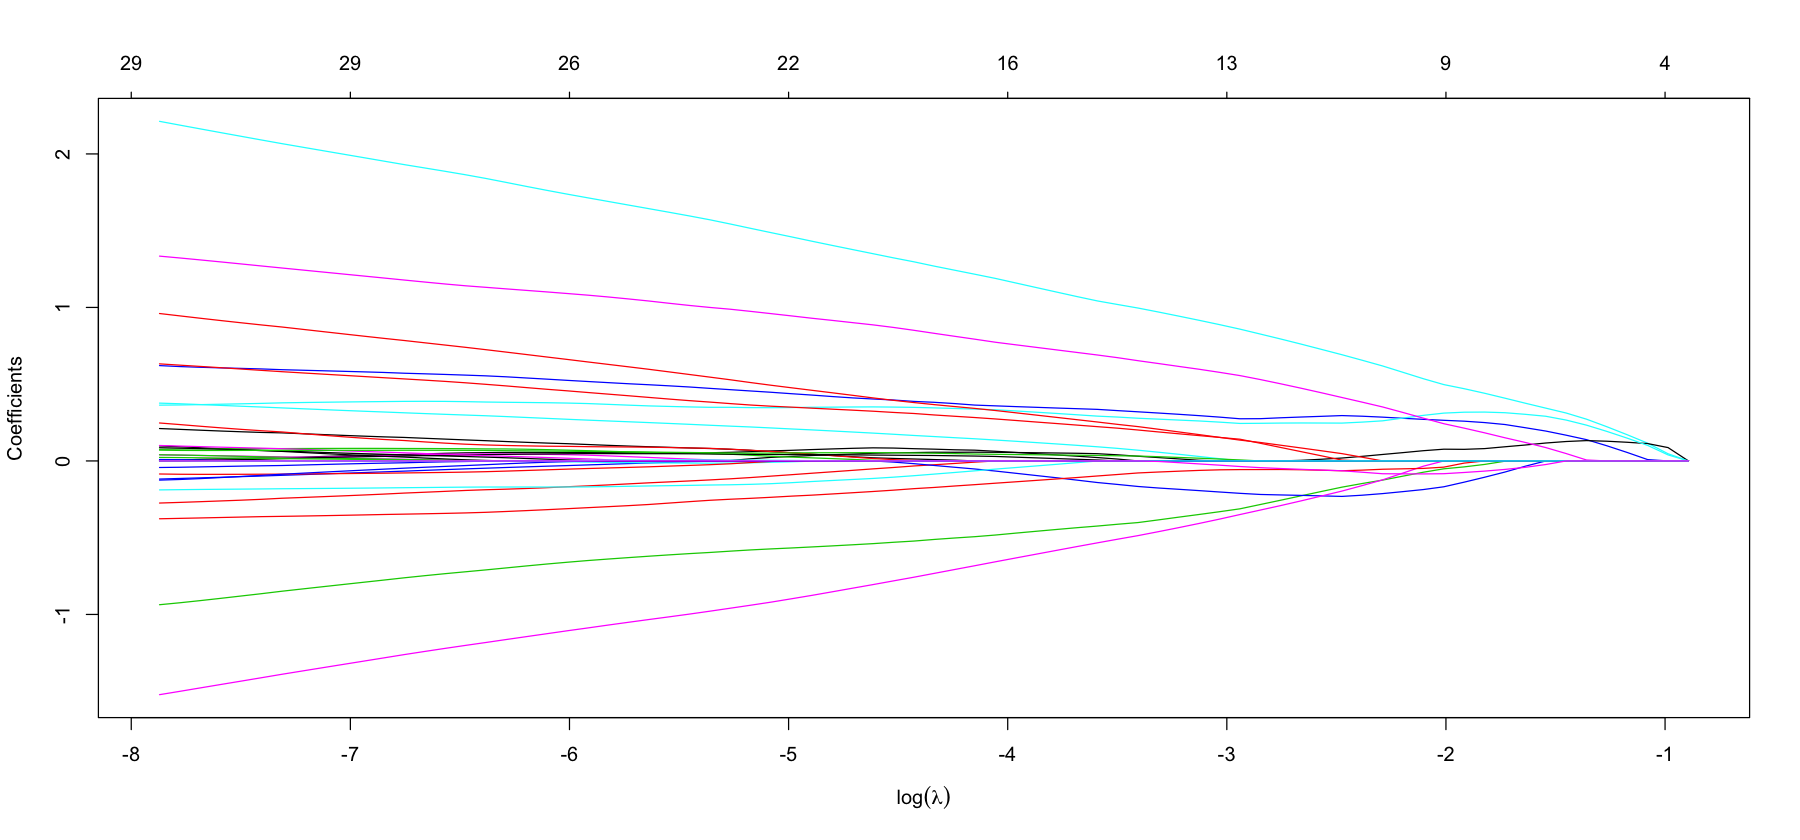

In [34]:
leukemia.lasso <- glmnet(Leukemia$x, Leukemia$y, alpha=1, family='binomial',
        lambda.min = 1e-4)
plot(leukemia.lasso, xvar='lambda', xlab=expression(log(lambda)))

In [ ]:
## lasso regression

#library(glmnet)
#m.lasso <- glmnet(mydata$x, mydata$y, alpha=1, family="binomial", lambda.min=1e-4)
#m.lasso

The output reports the value fo the deviance for each value of $\lambda$.

### comment

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered ... $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  Numbers ( NUMERO COVARIATE CHE HAI, repeated) over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:NUMERO COVARIATE CHE HAI is not repeated, as lasso regression is a selection method.


In [ ]:
## plot graphical evaluation

#options(repr.plot.width = 15, repr.plot.height = 7)
#par(mar = c(5.1, 6.1, 4.1, 2.1))
 #   par(mfrow=c(1,2))

#plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
#plot(m.lasso, xlab=expression(log(lambda)))
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

In [36]:
set.seed(111)
cv.leukemia.lasso <- cv.glmnet(Leukemia$x, Leukemia$y, alpha=1, family='binomial',
        lambda.min = 1e-4)
best.lambda.leukemia.lasso <- cv.leukemia.lasso$lambda.min
best.lambda.leukemia.lasso
min(cv.leukemia.lasso$cvm)

[1] 0.01309491

[1] 0.3604311

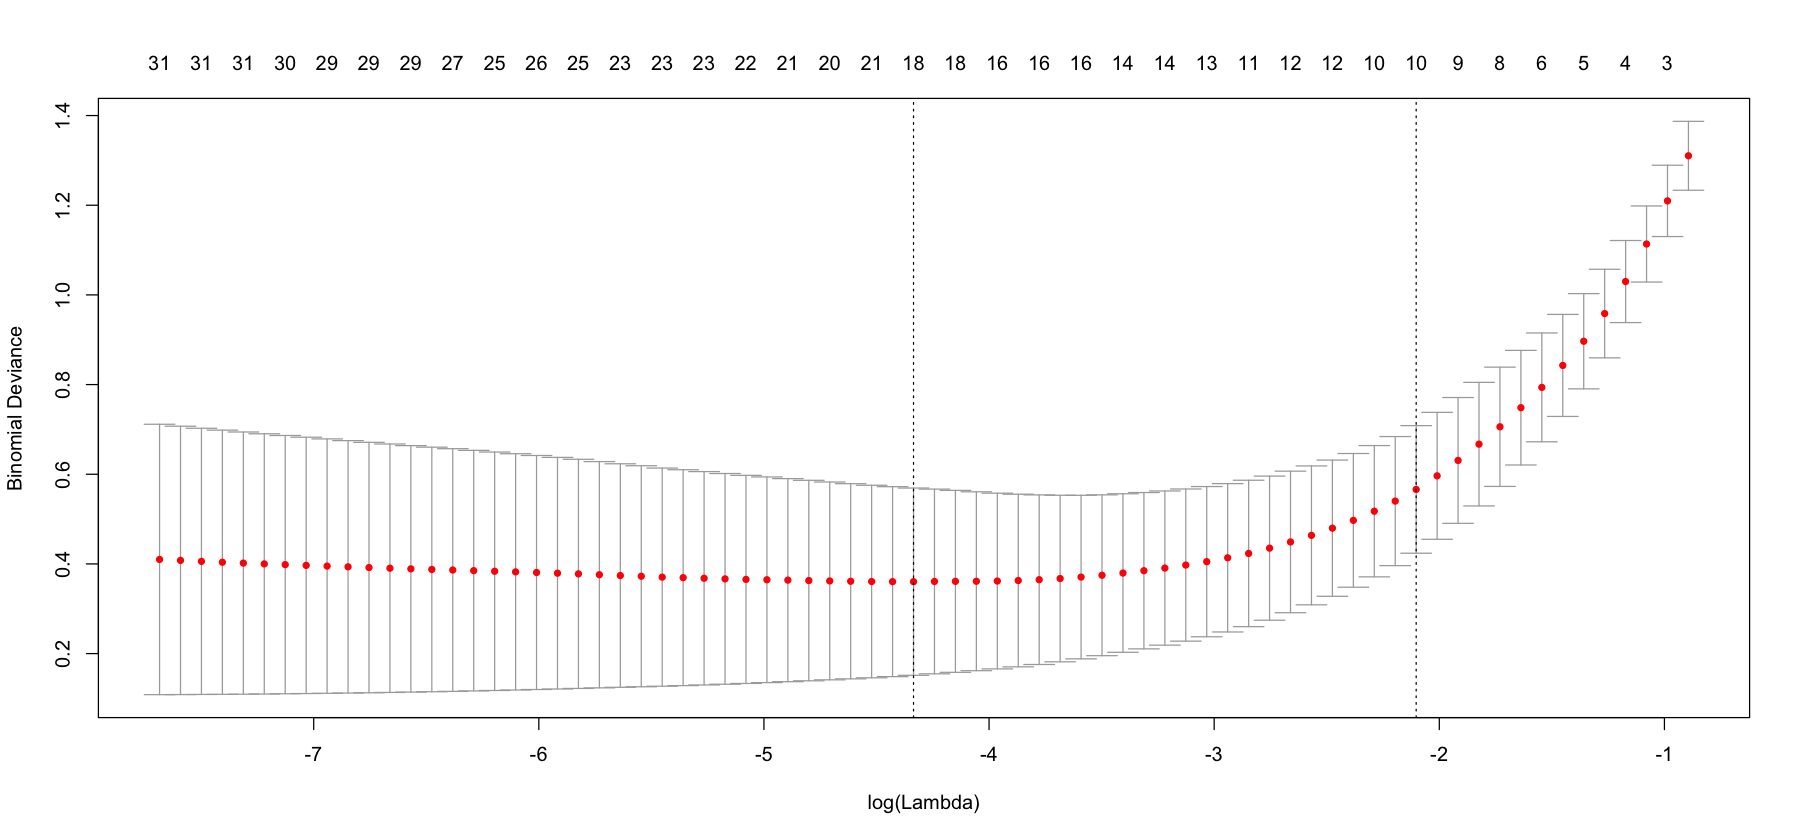

In [37]:
plot(cv.leukemia.lasso)

In [41]:
leukemia.lasso.min <- glmnet(Leukemia$x, Leukemia$y, alpha=1, family='binomial',
        lambda=best.lambda.leukemia.lasso)

id.zero <- which(coef(leukemia.lasso.min)==0)
length(id.zero)

nonzero <- length(coef(leukemia.lasso.min))-length(id.zero)
nonzero

id.nonzero <- which(coef(leukemia.lasso.min)!=0)
varnames <- rownames(coef(leukemia.lasso.min))[id.nonzero]
values <- coef(leukemia.lasso.min)[id.nonzero]
names(values) <- varnames
values

[1] 3552

[1] 20

(Intercept)        V158        V219        V456        V626        V657 
-1.65521810  0.07202171 -0.02375938 -0.51004786 -0.03068089 -0.08554004 
       V672        V888        V956        V979       V1182       V1219 
-0.73187650  0.01262145  0.38717845  1.27058301  0.05433433 -0.16994968 
      V1652       V1946       V2481       V2537       V2888       V3098 
 0.34747112  0.36690886  0.82814149  0.03601334  0.15800942  0.29946970 
      V3158       V3292 
 0.05125066  0.00120739


#### comment

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: VALORE BEST LAMBDA \
And the MSE is: VALORE MSE

In [ ]:
### cross validation plot

#set.seed(2906)
#options(warn=-1)
#cv.lasso <- cv.glmnet(mydata$x, mydata$y, alpha=1,family="binomial",lambda.min=1e-4)
#plot(cv.lassp, xlab=expression(log(lambda)))
#text(x=log(cv.lasso$lambda.min)+0.5, y=0.8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
#title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

#best.lambda <- cv.lasso$lambda.min
#best.lambda

#mse<-min(cv.lasso$cvm)
#mse

On the basis of MSE (!!!if they are similar took lasso since is simpler/ if they are different took the model with the lowest one), the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: VALORE. \

(if It is high because we use all the covariates!!! tell this)


Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular the coefficients equal to zero are (!! se sono troppi di solo il numero che ti esce dal codice e non usare il commsndo coeff(m.lasso.min)):
- coefficiente 1 con puntino su tabella
- coefficiente 2 con puntino su tabella
(NON FARE ELENCO SE HAI TANTI COEFF UGUALI A 0 E NON PLOTTARE TUTTI MA PLOTTA SOLO COEFFICIENTI NON NULLI CON COMANDO)

In [ ]:
#### best model

#m.lasso.min <- glmnet(mydata$x, mydata$y, alpha=1, lambda=best.lambda,family="binomial")
#m.lasso.min
#coef(m.lasso.min)

## number of coefficient diversi da 0

#id.zero <- which(coef(m.lasso.min)==0)
#nonzero <- length(coef(m.lasso.min))-length(id.zero)
#nonzero



#par(mfrow=c(1,2))
#plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
#title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
#plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
#        xlab=expression(log(lambda)), ylab='Explained deviance')
#abline(v=log(best.lambda), lty=2,color="blue")
#legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
#title (Graph of explained deviance,line=2.7)


## maxi explained deviance
#max(m.lasso$dev.ratio)

In [ ]:
### COEFF NON NULLI


#id.nonzero <- which(coef(m.lasso.min)!=0)
#varnames <- rownames(coef(m.lasso.min))[id.nonzero]
#values <- coef(m.lasso.min)[id.nonzero]
#names(values) <- varnames
#values